In [1]:
import importlib
import Policy 
import Environment
import Diadic

from tqdm.auto import tqdm

importlib.reload(Policy)
importlib.reload(Environment)
importlib.reload(Diadic)

import matplotlib.pyplot as plt
import numpy as np

/Users/nicolasnguyen/.pyenv/versions/3.10.4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Simulator:
    def __init__(self, algos, env, T):
        """
        algos: dict {name: algo_instance}
        """
        self.algos = algos  # dictionary of algorithms
        self.env = env
        self.T = T
        self.regrets = {name: [] for name in algos}  # track regrets for each algorithm

    def run(self):
        for t in tqdm(range(self.T)):
            for name, algo in self.algos.items():
                x_t = algo.choose_action()
                y_t = self.env.get_reward(t, x_t)
                algo.update(x_t, y_t)
                self.update_regret(name, t, x_t)

    def update_regret(self, name, t, x_t):
        best_mean_value_t = 1  # true best arm mean at time t (depends on env)
        r_t = best_mean_value_t - self.env.get_reward(t, x_t)
        self.regrets[name].append(r_t)

    def plot_regrets(self):
            plt.figure(figsize=(10, 6))
            for name, r_list in self.regrets.items():
                cumulative_regret = np.cumsum(r_list)
                plt.plot(cumulative_regret, label=name)

            plt.title("Cumulative Regret Comparison")
            plt.xlabel("Time")
            plt.ylabel("Cumulative Regret")
            plt.legend()
            plt.tight_layout()
            plt.show()


In [3]:
T = 150000
nb_shifts = 3
env = Environment.Environment(T, nb_shifts)

Entering Episode 1
Entering Block 3


/Users/nicolasnguyen/Documents/Projets/Non-Stationary Lipschitz Bandits/NS_Lipschitz_Bandits/Policy.py:262: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


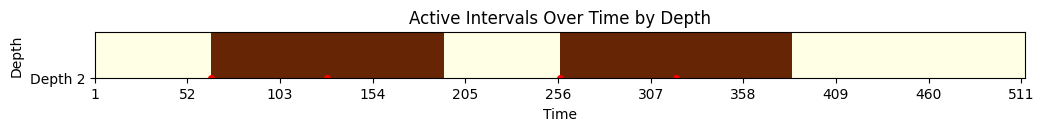

K optimal =  23
change points =  [50000, 100000, 150000]
[Phase 0] Init with K = 16


In [4]:
algo_MBDE = Policy.MBDE(T)
algo_BinningUCB = Policy.BinningUCB(T)
algo_BinningUCB_Oracle = Policy.BinningUCB_Oracle(T, nb_shifts)

In [5]:
sim = Simulator(
    algos={
        #"MBDE": algo_MBDE,
        "BinningUCB": algo_BinningUCB,
        "BinningUCB (Oracle)": algo_BinningUCB_Oracle,
    },
    env=env,
    T=T
)

sim.run()

 41%|████▏     | 62172/150000 [00:00<00:01, 69167.94it/s]

change phase at  50000
[Phase 1] Init with K = 16


 74%|███████▎  | 110259/150000 [00:01<00:00, 67330.56it/s]

change phase at  100000
[Phase 2] Init with K = 16


100%|██████████| 150000/150000 [00:02<00:00, 66341.41it/s]


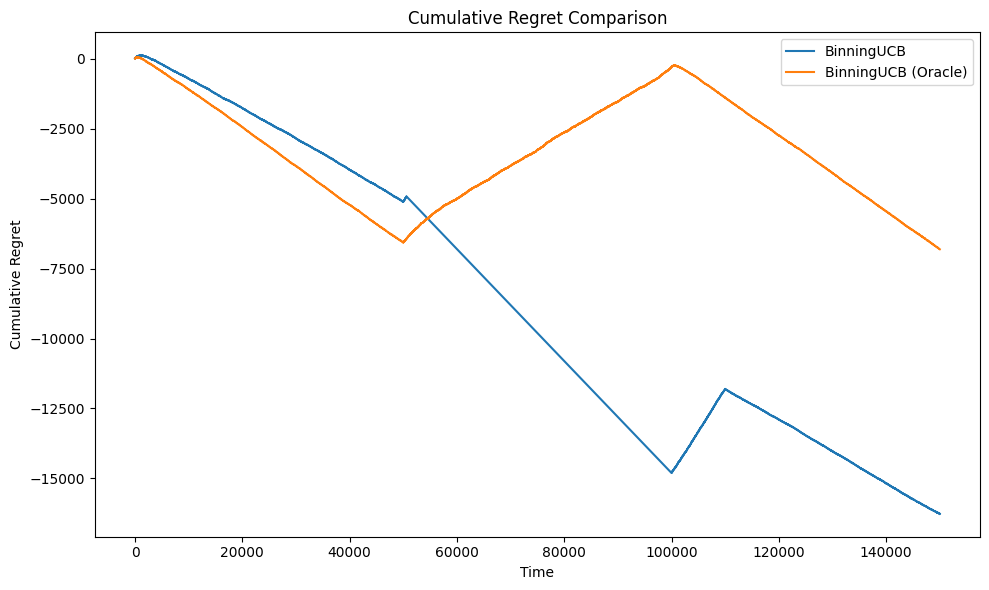

In [6]:
sim.plot_regrets()

In [37]:
class Simulator :
    def __init__(self, algo, env, T) -> None:
        self.algo = algo
        self.env = env
        self.T = T
    
    def run(self):
        
        for t in tqdm(range(self.T)) :
            x_t = self.algo.choose_action()
            y_t = self.env.get_reward(t, x_t)
            self.algo.update(x_t, y_t)
            self.update_regret(t, x_t)

    def update_regret(self, t, x_t):
        best_mean_value_t = 0.8 # assuming instances of this kind
        r_t = best_mean_value_t - self.env.get_reward(t, x_t)
        self.algo.regrets.append(r_t)
            

In [32]:
env.centers

array([0.1, 0.5, 0.9])

In [38]:
T = 150000
env = Environment.Environment(T, 3)

Entering Episode 1
Entering Block 3


/Users/nicolasnguyen/Documents/Projets/Non-Stationary Lipschitz Bandits/NS_Lipschitz_Bandits/Policy.py:258: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


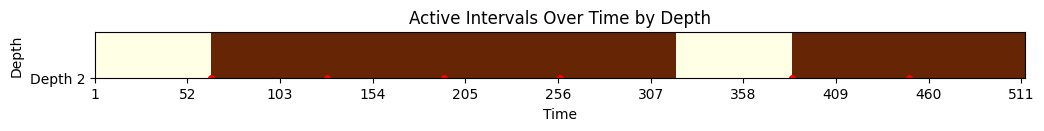

In [4]:
algo = Policy.MBDE(T)
algo.initialize_episode()
algo.initialize_block()
algo.tree.update_proba()
sim = Simulator(algo, env, T)


  3%|▎         | 504/20000 [00:01<01:29, 216.79it/s] 

Entering Block 4


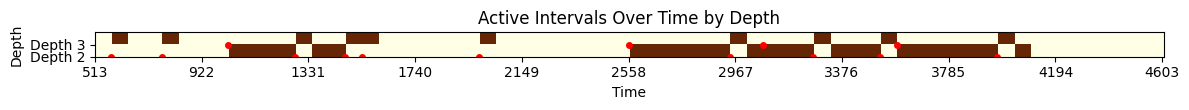

  5%|▌         | 1026/20000 [00:09<08:38, 36.56it/s]

evicted with interval [1018, 1022]
Node (4, 1) evicted at t=1022 (Replay(2))
evicted with interval [1018, 1022]
Node (4, 2) evicted at t=1022 (Replay(2))
evicted with interval [1018, 1022]
Node (4, 3) evicted at t=1022 (Replay(2))
evicted with interval [1018, 1022]
Node (4, 4) evicted at t=1022 (Replay(2))
evicted with interval [1018, 1022]
Node (4, 6) evicted at t=1022 (Replay(2))
evicted with interval [1018, 1022]
Node (4, 7) evicted at t=1022 (Replay(2))
evicted with interval [1018, 1022]
Node (4, 8) evicted at t=1022 (Replay(2))


 18%|█▊        | 3583/20000 [03:47<51:20,  5.33it/s] 

Entering Block 5


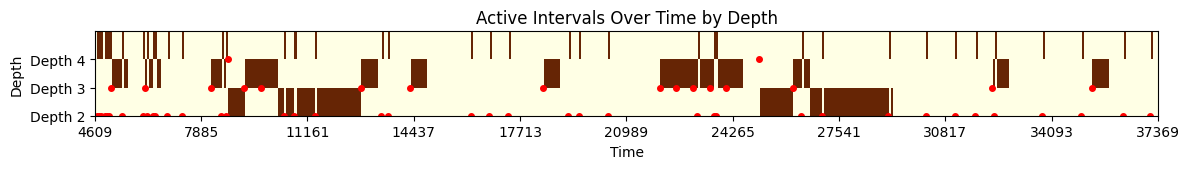

 24%|██▍       | 4823/20000 [03:48<00:27, 559.58it/s] 

evicted with interval [4700, 4706]
Node (5, 1) evicted at t=4706 (Replay(5))
evicted with interval [4700, 4706]
Node (5, 2) evicted at t=4706 (Replay(5))
evicted with interval [4700, 4706]
Node (5, 4) evicted at t=4706 (Replay(5))
evicted with interval [4700, 4706]
Node (5, 5) evicted at t=4706 (Replay(5))
evicted with interval [4700, 4706]
Node (5, 6) evicted at t=4706 (Replay(5))
evicted with interval [4700, 4706]
Node (5, 7) evicted at t=4706 (Replay(5))
evicted with interval [4700, 4706]
Node (5, 8) evicted at t=4706 (Replay(5))
evicted with interval [4700, 4706]
Node (5, 9) evicted at t=4706 (Replay(5))
evicted with interval [4700, 4706]
Node (5, 10) evicted at t=4706 (Replay(5))
evicted with interval [4700, 4706]
Node (5, 12) evicted at t=4706 (Replay(5))
evicted with interval [4700, 4706]
Node (5, 13) evicted at t=4706 (Replay(5))
evicted with interval [4700, 4706]
Node (5, 14) evicted at t=4706 (Replay(5))
evicted with interval [4700, 4706]
Node (5, 15) evicted at t=4706 (Repla

 26%|██▌       | 5240/20000 [04:06<11:34, 21.26it/s] 


KeyboardInterrupt: 

In [100]:
sim.run()

In [39]:
BinningUCB = Policy.BinningUCB(T)
sim = Simulator(BinningUCB, env, T)

K optimal =  23


In [40]:
sim.run()

100%|██████████| 150000/150000 [00:00<00:00, 151340.86it/s]


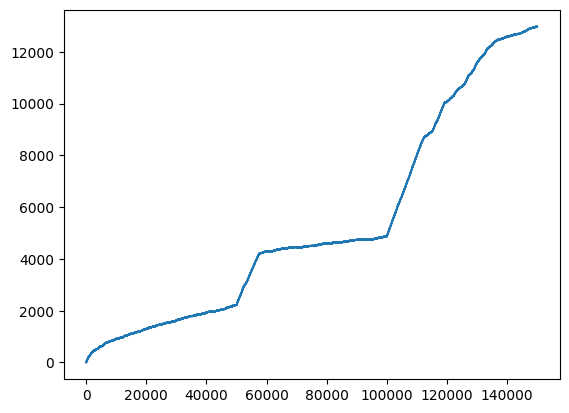

In [41]:
plt.plot(np.cumsum(sim.algo.regrets))
#plt.plot(np.cumsum([1 for _ in range(T)]))
#plt.plot([30*np.sqrt(x) for x in range(T)])

In [14]:
[10000*i for i in range(3)]

[0, 10000, 20000]

In [42]:
change_points = [50000*i for i in range(1,3)]
BinningUCB_Oracle = Policy.BinningUCB_Oracle(T, change_points)
sim = Simulator(BinningUCB_Oracle, env, T)

[Phase 0] Init with K = 16


In [43]:
sim.run()

 55%|█████▌    | 83206/150000 [00:00<00:00, 141917.29it/s]

change phase at  50000
[Phase 1] Init with K = 16


 84%|████████▍ | 126460/150000 [00:00<00:00, 140829.94it/s]

change phase at  100000
[Phase 2] Init with K = 16


100%|██████████| 150000/150000 [00:01<00:00, 139472.98it/s]


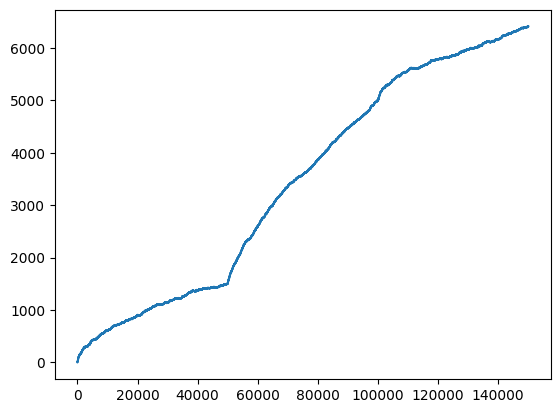

In [44]:
plt.plot(np.cumsum(sim.algo.regrets))

In [104]:
sim.algo.tree.visualize()

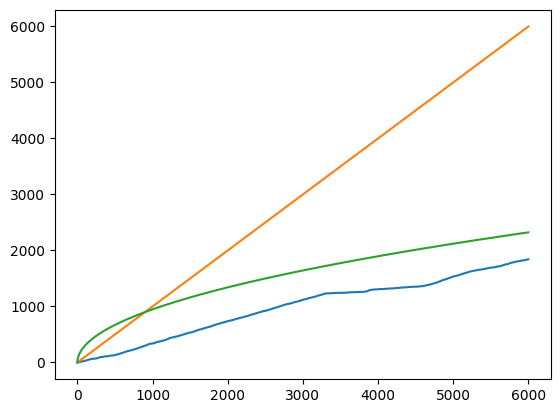

In [16]:
plt.plot(np.cumsum(sim.algo.regrets))
plt.plot(np.cumsum([1 for _ in range(T)]))
plt.plot([30*np.sqrt(x) for x in range(T)])

In [41]:
importlib.reload(Environment)
T = 150000
nb_shifts = 3
env = Environment.Environment(T, nb_shifts)

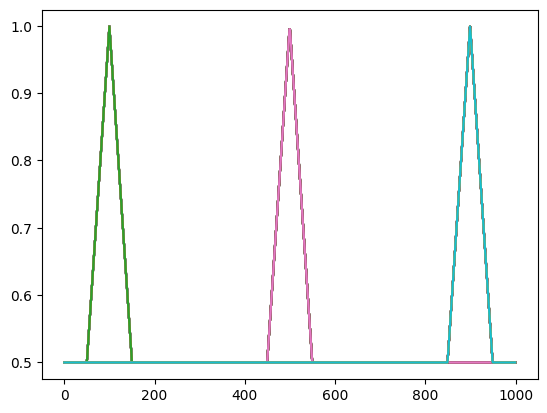

In [42]:
x_list = list(np.linspace(0, 1, 1000))
for t_test in np.linspace(1, T-1, 100) :
        
    y_list = [env.mean_reward(int(t_test), x) for x in x_list]
    plt.plot(y_list)